# Homework 2 
by Michał Komorowski <br />

## 1. Loading data and packages
### 1.1 Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from category_encoders import *
from category_encoders import CountEncoder
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

import warnings
warnings.filterwarnings('ignore')

### 1.2 Data


In [2]:
df = pd.read_csv("allegro-api-transactions.csv")

df.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,"Odzież, Obuwie, Dodatki"


In [3]:
df.shape

(420020, 14)

### 1.3 Splitting the data

In [4]:
X = df.loc[:, df.columns != "price"]
y = df.price

## 2. Encoding

### 2.1 Target encoding

In [5]:
te = TargetEncoder(cols="it_location")
te.fit(X, y)
df_te = te.transform(X, y)

df_te.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,1,997,0,50177,85.423398,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,1,9288,0,12428,85.423398,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,1,895,0,7389,61.990914,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,0,971,0,15006,35.433365,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,1,950,0,32975,117.191956,"Odzież, Obuwie, Dodatki"


In [6]:
before = len(X["it_location"].unique())
after = len(df_te["it_location"].unique())

print(f"Unique values in it_location before target encoding: {before}")
print(f"Unique values in it_location after target encoding: {after}")

Unique values in it_location before target encoding: 10056
Unique values in it_location after target encoding: 6284


### 2.2 One-hot encoding
#### 2.2.1 `it_location` column

Over 10 thousand unique values definitely does not make this metod effective for this column.  <br />
After grouping the cities this number would decrease but it would probably still be too big.

#### 2.2.2 `main_category` column

In [7]:
len(X.main_category.unique())

27

In [8]:
ohe = OneHotEncoder(cols="main_category", use_cat_names=True)

ohe.fit(X, y)
df_ohe = ohe.transform(X, y)

df_ohe.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,it_is_allegro_standard,it_quantity,it_is_brand_zone,...,main_category_Filmy,main_category_Fotografia,main_category_Biuro i Reklama,main_category_Instrumenty,main_category_Muzyka,main_category_Konsole i automaty,"main_category_Sprzęt estradowy, studyjny i DJ-ski",main_category_Antyki i Sztuka,main_category_Bilety,main_category_Nieruchomości
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,1,997,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,1,9288,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,1,895,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,0,971,0,...,0,0,0,0,0,0,0,0,0,0
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,1,950,0,...,0,0,0,0,0,0,0,0,0,0


### 2.3 LeaveOneOut encoding

This encoder works similar  to `TargetEncoder` but works better if there are a lot of outliers in target column.

In [9]:
loo = LeaveOneOutEncoder(cols="main_category")

loo.fit(X, y)
df_loo = loo.transform(X, y)

df_loo.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,1,997,0,50177,Warszawa,121.814331
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,1,9288,0,12428,Warszawa,75.859357
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,1,895,0,7389,Leszno,72.434342
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,0,971,0,15006,Wola Krzysztoporska,25.028061
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,1,950,0,32975,BIAŁYSTOK,75.859080


### 2.4 CountEncoder

This encoder replaces each category with number of it's occurrences in the column.

In [10]:
ce = CountEncoder(cols="main_category")

ce.fit(X, y)
df_ce = ce.transform(X, y)

df_ce.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,1,997,0,50177,Warszawa,14491
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,1,9288,0,12428,Warszawa,54257
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,1,895,0,7389,Leszno,91042
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,0,971,0,15006,Wola Krzysztoporska,11572
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,1,950,0,32975,BIAŁYSTOK,54257


## 3. Missing data

In [11]:
df = pd.read_csv("allegro-api-transactions.csv", usecols=["price", "it_seller_rating", "it_quantity"])

df.head()

,price,it_quantity,it_seller_rating
0,59.99,997,50177
1,4.90,9288,12428
2,109.90,895,7389
3,18.50,971,15006
4,19.90,950,32975


In [12]:
df_manipu = df.copy(deep=True)
 
df_manipu.loc[df.sample(frac=0.1).index, "it_seller_rating"] = np.nan

In [13]:
df_manipu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420020 entries, 0 to 420019
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   price             420020 non-null  float64
 1   it_quantity       420020 non-null  int64  
 2   it_seller_rating  378018 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 9.6 MB


In [14]:
imp = IterativeImputer(max_iter=100, random_state=0)
df_transformed = pd.DataFrame(imp.fit_transform(df_manipu), columns=df.columns)

In [15]:
df_transformed

,price,it_quantity,it_seller_rating
0,59.99,997.0,50177.000000
1,4.90,9288.0,12428.000000
2,109.90,895.0,7389.000000
3,18.50,971.0,15006.000000
4,19.90,950.0,32975.000000
...,...,...,...
420015,180.00,0.0,19820.092975
420016,14.99,2.0,34851.000000
420017,5.99,470.0,983.000000
420018,200.00,0.0,163.000000


In [16]:
rms = mean_squared_error(df.it_seller_rating, df_transformed.it_seller_rating, squared=False)

rms

11549.070809421368

In [17]:
errors = []

for i in range(10):
    df_manipu = df.copy(deep=True)
    df_manipu.loc[df.sample(frac=0.01).index, "it_seller_rating"] = np.nan

    imp = IterativeImputer(max_iter=10, random_state=0)
    df_transformed = pd.DataFrame(imp.fit_transform(df_manipu), columns=df.columns) 

    rms = mean_squared_error(df.it_seller_rating, df_transformed.it_seller_rating, squared=False)
    errors.append(rms)

In [18]:
np.std(errors)

142.7288628894021

In [19]:
errors2 = []

for i in range(10):
    df_manipu = df.copy(deep=True)
    df_manipu.loc[df.sample(frac=0.1).index, "it_quantity"] = np.nan
    df_manipu.loc[df.sample(frac=0.1).index, "it_seller_rating"] = np.nan

    imp = IterativeImputer(max_iter=10, random_state=0)
    df_transformed = pd.DataFrame(imp.fit_transform(df_manipu), columns=df.columns) 

    rms = mean_squared_error(df.it_seller_rating, df_transformed.it_seller_rating, squared=False)
    errors2.append(rms)

In [20]:
np.std(errors2)

75.02533064966025

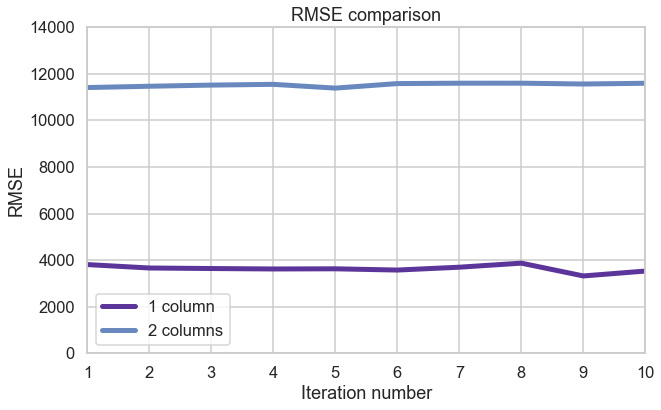

In [21]:
error_df = pd.DataFrame({'1 column': errors, '2 columns': errors2})
error_df.index = np.arange(1, len(error_df) + 1)

sns.set(rc={'figure.figsize':(10, 6)})
sns.set_style("whitegrid")
sns.set_context("talk")
sns.set_palette("twilight_shifted")

g = sns.lineplot(data=error_df, x=error_df.index, y="1 column", linewidth = 5)
g = sns.lineplot(data=error_df, x=error_df.index, y="2 columns", linewidth = 5)

g.set(ylim=(0, 14000))
g.set(xlim=(1, 10))
g.set_title("RMSE comparison")
g.set_xlabel("Iteration number")
g.set_ylabel("RMSE")
g.legend(labels=["1 column", "2 columns"])

plt.show()